In [1]:
setwd('E:/notebook/miMatch')
library(plyr)
library(dplyr)
library(ggplot2)
#install.packages("hrbrthemes")
library(hrbrthemes)

Warning message:
"package 'plyr' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'hrbrthemes' was built under R version 4.2.2"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [2]:
pair<-read.csv("./Label/fenzu.csv")
colnames(pair)<-c("Project","study_name","body_site","condition1","condition2")

# Alpha-diversity difference between matched and unmatched studies

In [3]:
alpha<-read.csv("./Results/Results2/3. Alpha_diversity_braycurtis.csv",row.names = 1)
head(alpha)

,Project,Delta_PS_Unmatched,Delta_PS_Matched,Unmatched,Matched
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,08,2.895914,8.8484643,0.007345935,19.2696374
1,09,2.617320,0.2682587,0.536000063,1.6661265
2,100,1.722361,0.1008739,1.436501965,0.7498675
3,101,2.532701,0.2262202,1.030975077,2.7971068
4,11,4.223416,0.3986592,1.027554247,0.4543826
5,15,4.029124,0.3708135,2.708845128,1.4082400


In [4]:
ldata<-join(alpha,pair,match="first")
ldata$id<-paste(ldata$study_name,ldata$Project,sep="_")
alpha$id=ldata$id
alpha$cha=abs(alpha$Matched-alpha$Unmatched)

Joining by: Project



Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


png 
  2

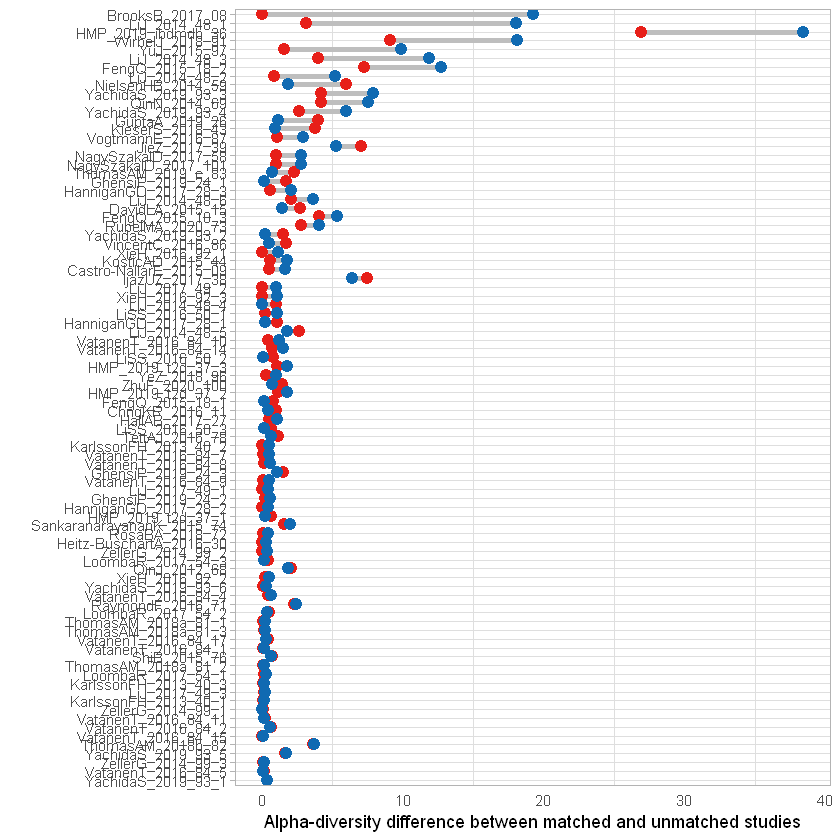

In [5]:
pa<-ggplot(alpha) +
  geom_segment(aes(x=reorder(id,cha), xend=reorder(id,cha),y=Unmatched,yend=Matched),
               color="grey",size=1.5) +
  geom_point(aes(x=id, y=Unmatched),color="#E71F19",size=3) +
  geom_point(aes(x=id, y=Matched),color="#106AB2",size=3) +
  theme_light()+theme(panel.grid.major.x=element_blank(),
                      axis.ticks.x=element_blank())+
  xlab("")+
  ylab("Alpha-diversity difference between matched and unmatched studies")+
  coord_flip()
pa
#pdf("./Results/Results2/5.1 AlphaChanges_study.pdf",width =8,height =10)
#pa
#dev.off()

Joining by: case



png 
  2

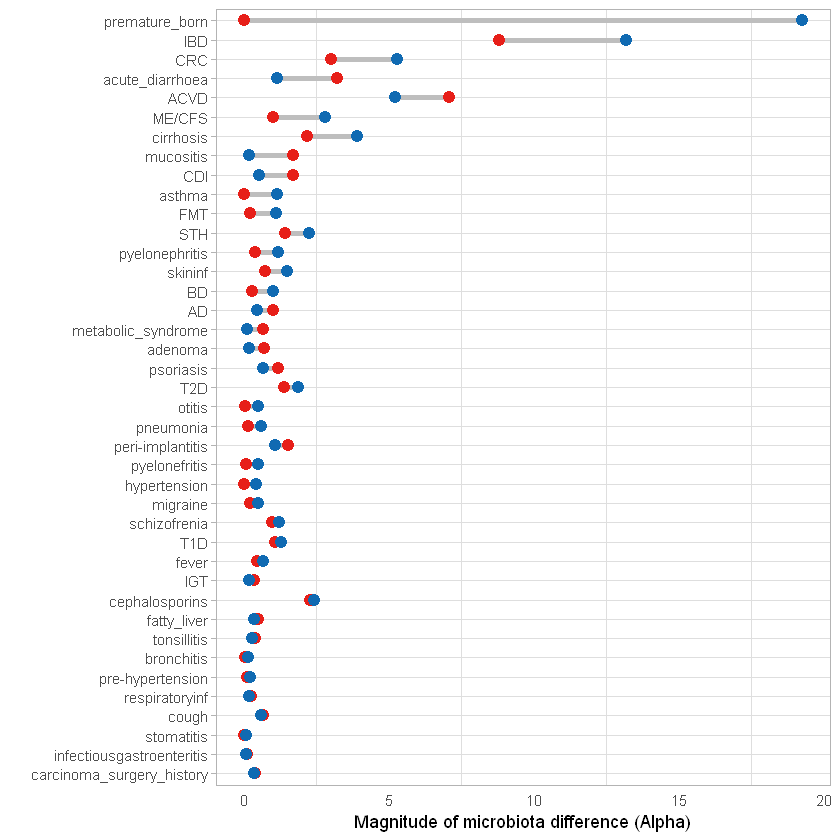

In [6]:
data<-ldata[which(ldata$condition1=="control"),]
#table(data$condition2)
data1<-aggregate(data$Unmatched,
                 by=list(data$condition2),
                 mean)
colnames(data1)<-c("case","Unmatched")
data2<-aggregate(data$Matched,
                 by=list(data$condition2),
                 mean)
colnames(data2)<-c("case","Matched")
data3<-join(data1,data2,match="first")
data3$cha<-data3$Unmatched-data3$Matched
#data3<-data3[order(data3$PERMANOVA_Unmatched,decreasing = T),]
pac<-ggplot(data3) +
      geom_segment(aes(x=reorder(case,abs(cha)), xend=reorder(case,abs(cha)),y=Unmatched,yend=Matched),
                   color="grey",size=1.5) +
      geom_point(aes(x=case, y=Unmatched),color="#E71F19",size=3) +
      geom_point(aes(x=case, y=Matched),color="#106AB2",size=3) +
      theme_light()+theme(panel.grid.major.x=element_blank(),
                          axis.ticks.x=element_blank())+
      xlab("")+
      ylab("Magnitude of microbiota difference (Alpha)")+
      coord_flip()
pac
#pdf("./Results/Results2/5.1 AlphaChanges_case.pdf",width =6,height =6)
#pac
#dev.off()

# Beta-diversity difference between matched and unmatched studies

In [14]:
beta<-read.csv("./Results/Results2/3. Beta_diversity_braycurtis.csv",row.names = 1)
ldata<-join(beta,pair,match="first")
ldata$id<-paste(ldata$study_name,ldata$Project,sep="_")
beta$id=ldata$id
beta$cha=abs(beta$PERMANOVA_Matched-beta$PERMANOVA_Unmatched)
head(beta)


Joining by: Project



,Project,Delta_PS_Unmatched,Delta_PS_Matched,ANOSIM_Unmatched,PERMANOVA_Unmatched,ANOSIM_Matched,PERMANOVA_Matched,id,cha
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,08,2.895914,8.8484643,1.698970,3.000000,1.39794001,2.5228787,BrooksB_2017_08,0.4771213
1,09,2.617320,0.2682587,2.698970,3.000000,1.46852108,1.3279021,Castro-NallarE_2015_09,1.6720979
2,100,1.722361,0.1008739,2.301030,1.677781,1.56863624,1.3665315,ZhuF_2020_100,0.3112492
3,101,2.532701,0.2262202,3.000000,2.698970,2.04575749,2.6989700,NagySzakalD_2017_101,0.0000000
4,11,4.223416,0.3986592,2.698970,2.397940,2.09691001,2.5228787,ChngKR_2016_11,0.1249387
5,15,4.029124,0.3708135,1.387216,3.000000,0.04048162,0.8013429,DavidLA_2015_15,2.1986571


png 
  2

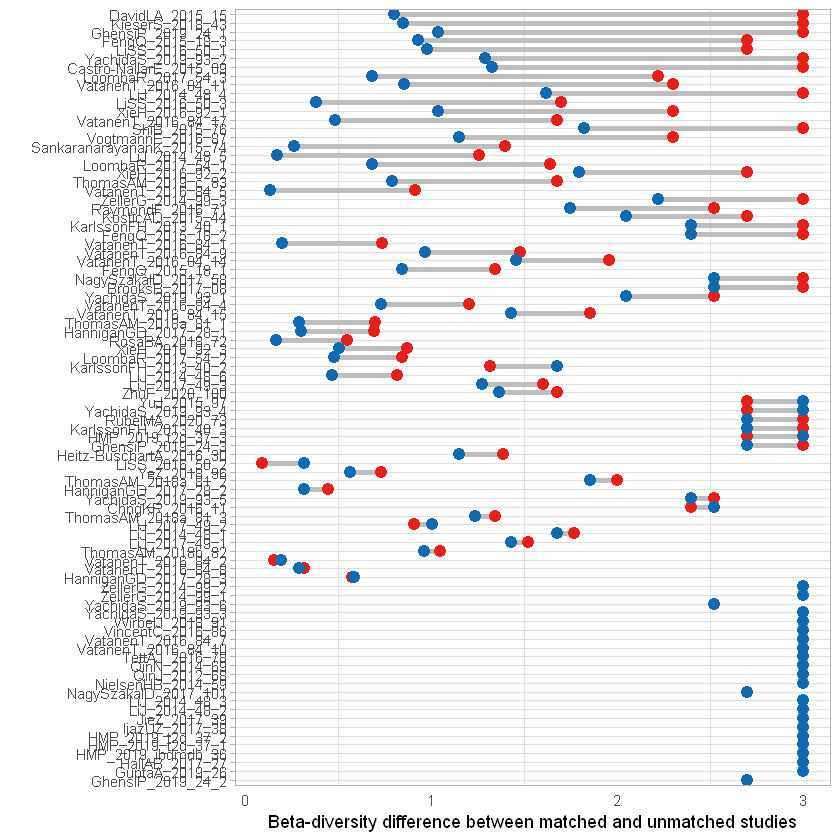

In [15]:
pb<-ggplot(beta) +
      geom_segment(aes(x=reorder(id,cha), xend=reorder(id,cha),y=PERMANOVA_Unmatched,yend=PERMANOVA_Matched),
                   color="grey",size=1.5) +
      geom_point(aes(x=id, y=PERMANOVA_Unmatched),color="#E71F19",size=3) +
      geom_point(aes(x=id, y=PERMANOVA_Matched),color="#106AB2",size=3) +
      theme_light()+theme(panel.grid.major.x=element_blank(),
                          axis.ticks.x=element_blank())+
      xlab("")+
      ylab("Beta-diversity difference between matched and unmatched studies")+
      coord_flip()
pb
#pdf("./Results/Results2/5.2 BetaChanges_study.pdf",width =8,height =10)
#pb
#dev.off()

Joining by: case



png 
  2

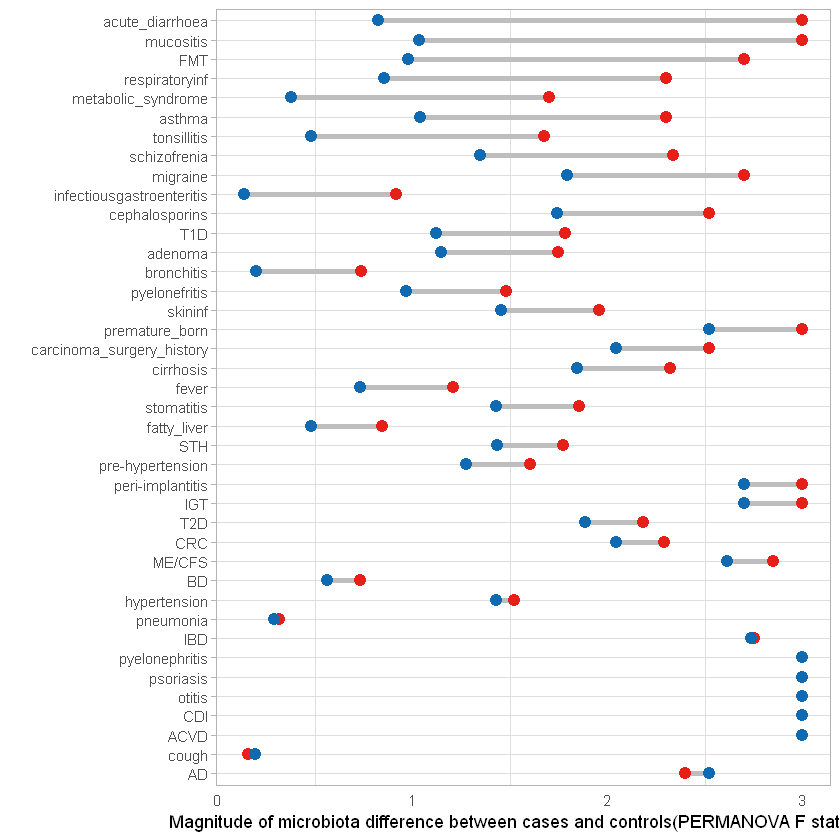

In [8]:
data<-ldata[which(ldata$condition1=="control"),]
data1<-aggregate(data$PERMANOVA_Unmatched,
                 by=list(data$condition2),
                 mean)
colnames(data1)<-c("case","PERMANOVA_Unmatched")
data2<-aggregate(data$PERMANOVA_Matched,
                 by=list(data$condition2),
                 mean)
colnames(data2)<-c("case","PERMANOVA_Matched")
data3<-join(data1,data2,match="first")
data3$cha<-data3$PERMANOVA_Unmatched-data3$PERMANOVA_Matched
data3<-data3[order(data3$PERMANOVA_Unmatched,decreasing = T),]
pbc<-ggplot(data3) +
      geom_segment(aes(x=reorder(case,cha), xend=reorder(case,cha),y=PERMANOVA_Unmatched,yend=PERMANOVA_Matched),
                   color="grey",size=1.5) +
      geom_point(aes(x=case, y=PERMANOVA_Unmatched),color="#E71F19",size=3) +
      geom_point(aes(x=case, y=PERMANOVA_Matched),color="#106AB2",size=3) +
      theme_light()+theme(panel.grid.major.x=element_blank(),
                          axis.ticks.x=element_blank())+
      xlab("")+
      ylab("Magnitude of microbiota difference between cases and controls(PERMANOVA F statistic)")+
      coord_flip()
pbc
#pdf("./Results/Results2/5.2 BetaChanges_case.pdf",width =6,height =6)
#pbc
#dev.off()

# propensity score

In [10]:
psm<-read.csv("./Results/Results2/2.PSMdata.csv",row.names = 1)
pair<-read.csv("./Label/fenzu.csv")
colnames(pair)<-c("Project","study_name","body_site","condition1","condition2")

data<-join(psm,pair,match="first")
data<-data[which(data$condition1=="control"),]
head(data)

Joining by: Project



,Project,Control,Case,Control_matched,Case_matched,Delta_Unmatched,Delta_Matched,study_name,body_site,condition1,condition2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0,08,0.9383934,0.9883574,0.9831757,0.9837481,0.04996404,5.724311e-04,BrooksB_2017,stool,control,premature_born
1,09,0.3739333,0.6260667,0.6275060,0.6316325,0.25213333,4.126448e-03,Castro-NallarE_2015,oralcavity,control,schizofrenia
2,100,0.5050294,0.5454735,0.5319997,0.5320483,0.04044416,4.857716e-05,ZhuF_2020,stool,control,schizofrenia
3,101,0.4606407,0.5393593,0.5203611,0.5200119,0.07871866,3.491400e-04,NagySzakalD_2017,stool,control,ME/CFS
4,11,0.3845975,0.5951605,0.5504041,0.5528642,0.21056301,2.460071e-03,ChngKR_2016,skin,control,AD
5,15,0.4200254,0.9005203,0.7807039,0.7843873,0.48049494,3.683422e-03,DavidLA_2015,stool,control,acute_diarrhoea


Joining by: case



png 
  2

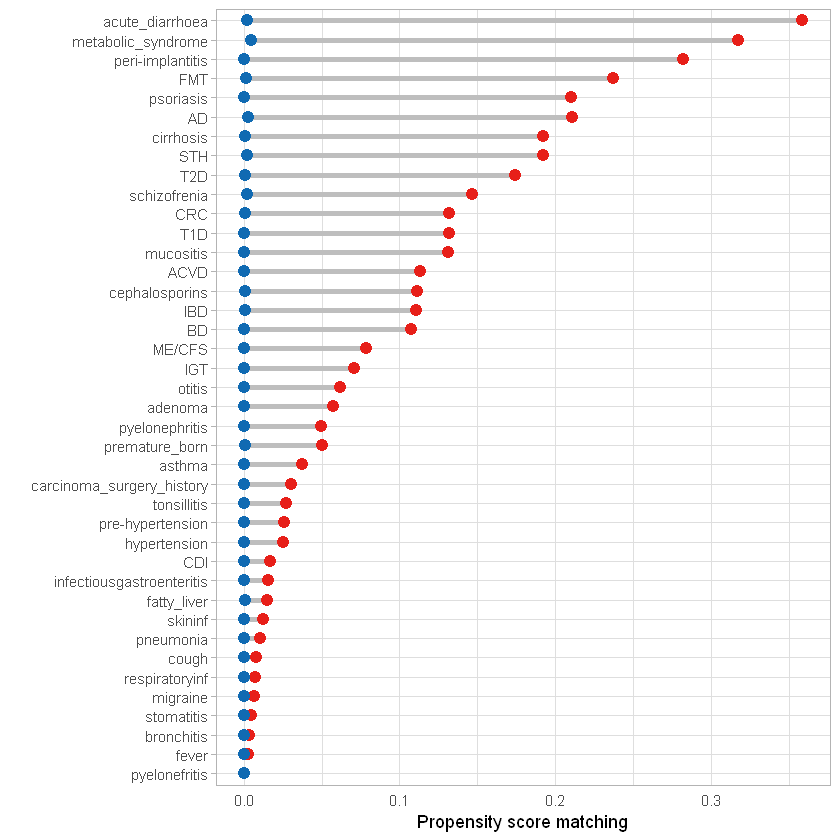

In [11]:
data1<-aggregate(data$Delta_Unmatched,
                 by=list(data$condition2),
                 mean)
colnames(data1)<-c("case","Delta_Unmatched")
data2<-aggregate(data$Delta_Matched,
                 by=list(data$condition2),
                 mean)
colnames(data2)<-c("case","Delta_Matched")
data3<-join(data1,data2,match="first")
data3$cha<-data3$Delta_Unmatched-data3$Delta_Matched

ppsm<-ggplot(data3) +
      geom_segment(aes(x=reorder(case,cha), xend=reorder(case,cha),
                       y=Delta_Unmatched,yend=Delta_Matched),color="grey",size=1.5) +
      geom_point(aes(x=case, y=Delta_Unmatched),color="#E71F19",size=3) +
      geom_point(aes(x=case, y=Delta_Matched),color="#106AB2",size=3) +
      theme_light()+theme(axis.ticks.x=element_blank())+
      xlab("")+
      ylab("Propensity score matching")+coord_flip()
ppsm
pdf("./Results/Results2/5.3 PSMChanges_case.pdf",width =6,height =6)
ppsm
dev.off()